In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Прочитайте csv файл (використовуйте функцію read_csv)

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть перші п'ять рядків (використовується функція head)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
df.shape

(550, 7)

Відповідь: Про скільки книг зберігає дані датасет? - 550 книг

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

*  Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [7]:
average_isnull = df.isnull().sum()
print(average_isnull)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


*  Відповідь: Чи є в якихось змінних пропуски? ні

*  Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [9]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

*  Відповідь: Які є унікальні жанри? 'Non Fiction', 'Fiction'

*  Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

Text(0, 0.5, 'Частота')

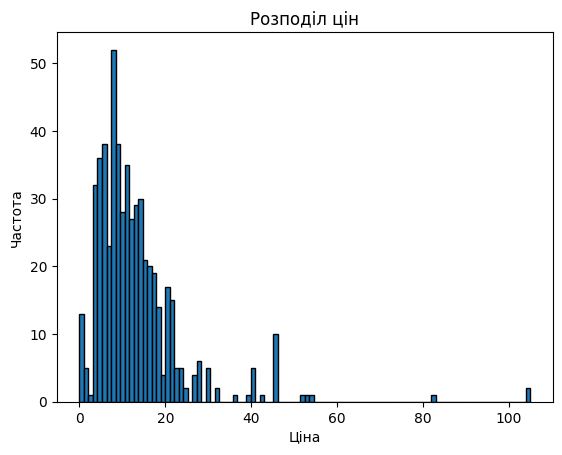

In [18]:
price = df['price']
price.plot(kind='hist', bins=100, edgecolor='black')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

*  Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [21]:
price_max = price.max()
price_max

105

Відповідь: Максимальна ціна? 105

In [22]:
price_min = price.min()
price_min

0

Відповідь: Максимальна ціна? 0

In [23]:
price_mean = price.mean()
price_mean

13.1

Відповідь: Середня ціна? 13.1

In [24]:
price_median = price.median()
price_median

11.0

Відповідь: Середня ціна? 11.0

# Пошук та сортування даних

In [27]:
user_rating_max = df['user_rating'].max()
user_rating_max

4.9

* Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [39]:
count_user_rating = df['user_rating'].value_counts()
count_user_rating

user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

*  Скільки книг мають такий рейтинг? Відповідь:52

In [48]:
reviews_max = df['reviews']
reviews_max.max()

87841

In [51]:
id_book = reviews_max.idxmax()
id_book

534

In [53]:
row = df.loc[534]
row

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [55]:
book_reviews_max = row['name']
book_reviews_max

'Where the Crawdads Sing'

*  Яка книга має найбільше відгуків? Відповідь: 'Where the Crawdads Sing'

цикл

In [76]:
top_50_2015 = dict()
price_max = None
price_max_name = None

for name, year, price in zip(df['name'], df['year'], df['price']):
    top_50_2015[name] = price
    
    if price_max is None or price_max < price and year == 2015:
        price_max = price
        price_max_name = name

print(price_max_name, price_max)

Publication Manual of the American Psychological Association, 6th Edition 46


проміжний датафрейм

In [69]:
df_2015 = df[df['year'] == 2015]

In [70]:
df_2015_sorted = df_2015.sort_values('price', ascending=False)

In [74]:
result = df_2015_sorted.iloc[0]
result

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

*  З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 46

In [80]:
df_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == "Fiction")]
df_2010_fiction

,name,author,user_rating,reviews,price,year,genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
56,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction
61,Dead in the Family (Sookie Stackhouse/True Blo...,Charlaine Harris,4.3,1924,8,2010,Fiction
218,Little Bee: A Novel,Chris Cleave,4.1,1467,10,2010,Fiction
236,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2010,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
292,Sarah's Key,Tatiana de Rosnay,4.6,3619,10,2010,Fiction
340,The Art of Racing in the Rain: A Novel,Garth Stein,4.7,11813,10,2010,Fiction
357,The Confession: A Novel,John Grisham,4.3,3523,13,2010,Fiction
384,The Girl Who Kicked the Hornet's Nest (Millenn...,Stieg Larsson,4.7,7747,14,2010,Fiction


In [81]:
df_2010_fiction.shape

(20, 7)

In [82]:
len(df_2010_fiction)

20

*  Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [86]:
years = [2010, 2011]
c = 4.9

df_2010_2011_rating_4_9 = df[(df['year'].isin(years)) & (df['user_rating'] == user_rating)]
df_2010_2011_rating_4_9

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [88]:
len(df_2010_2011_rating_4_9)

1

*  Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [89]:
sort_2015_8dol = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
sort_2015_8dol

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


*  Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

# Агрегування даних та з'єднання таблиць

* Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [92]:
genre_min_max_price = df.groupby('genre')['price'].agg(['min', 'max'])
genre_min_max_price

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


* Максимальна ціна для жанру Fiction: Відповідь 82
* Мінімальна ціна для жанру Fiction: Відповідь   0
* Максимальна ціна для жанру Non Fiction: Відповідь  105
* Мінімальна ціна для жанру Non Fiction: Відповідь     0

In [99]:
author_counts_book = df.groupby('author').agg(book_count=('name', 'count')).reset_index().sort_values('book_count', ascending=False)
author_counts_book

,author,book_count
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10
...,...,...
61,David Grann,1
143,Larry Schweikart,1
62,David McCullough,1
141,Khaled Hosseini,1


In [97]:
author_counts_book.shape

(248, 2)

* Якої розмірності вийшла таблиця? Відповідь: (248, 2)

* Який автор має найбільше книг? Відповідь: Jeff Kinney

* Скільки книг цього автора? Відповідь: 12

In [101]:
author_ratings = df.groupby('author').agg(avg_rating=('user_rating', 'mean')).reset_index()
author_ratings

,author,avg_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [102]:
author_ratings.min()

author        Abraham Verghese
avg_rating                 3.9
dtype: object

* У якого автора середній рейтинг мінімальний? Відповідь:Abraham Verghese
* Який у цього автора середній рейтинг? Відповідь: 3.9

* З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [103]:
author_counts_book = author_counts_book.sort_index()
author_counts_book

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [104]:
author_ratings

,author,avg_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [105]:
merg_df = pd.concat([author_counts_book, author_ratings['avg_rating']], axis=1)
merg_df

,author,book_count,avg_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


* Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [106]:
sort_df = merg_df.sort_values(['book_count', 'avg_rating'])
sort_df

,author,book_count,avg_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


* Який автор перший у списку? Muriel Barbery	